In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Default title text
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# batchsize also decides the dimension of testinf and training tensors
# (len test and train tensor) = batchsize
batch_size = 40
img_height = 256
img_width = 256

In [ ]:
# loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './drive/MyDrive/kaggle/dataset_grayscaled/train',
    # validation_split=0.2,
    #subset= "training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2467 files belonging to 4 classes.


In [ ]:
# loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
     '/content/drive/MyDrive/test_grayscaledkaggle',
    # validation_split=0.2,
    #subset= "validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 236 files belonging to 4 classes.


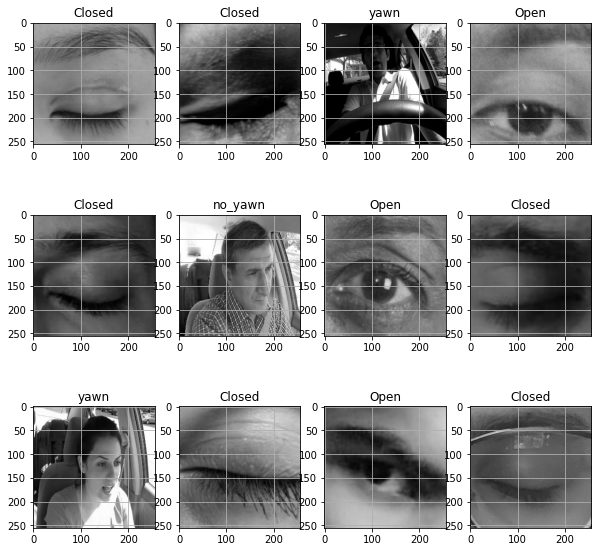

In [ ]:
class_names = training_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # print(images[i])
        plt.title(class_names[labels[i]])
        plt.grid(True)



In [ ]:

# Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# saved_model = "./content/drive/MyDrive/drowsiness-stage1.h5"
MyCnn = tf.keras.models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
     layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
     layers.AveragePooling2D(),
    layers.Conv2D(256, 3, activation='relu'),
     layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])
# # my_new_model = MyCnn()
# MyCnn.add(MyCnn(include_top=False, pooling='avg', weights=saved_model))
# # Say not to train first layer model. It is already trained
# my_new_model.layers[0].trainable = False

In [ ]:
MyCnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# lets train our CNN
retVal = MyCnn.fit(training_ds, validation_data=testing_ds, epochs=100)

Epoch 1/100
62/62 [==============================] - 374s 6s/step - loss: 1.0554 - accuracy: 0.4143 - val_loss: 0.7159 - val_accuracy: 0.4958
Epoch 2/100
62/62 [==============================] - 10s 166ms/step - loss: 0.6945 - accuracy: 0.5821 - val_loss: 0.7853 - val_accuracy: 0.5297
Epoch 3/100
62/62 [==============================] - 10s 166ms/step - loss: 0.6871 - accuracy: 0.6060 - val_loss: 0.6351 - val_accuracy: 0.6398
Epoch 4/100
62/62 [==============================] - 10s 165ms/step - loss: 0.6493 - accuracy: 0.6340 - val_loss: 0.6307 - val_accuracy: 0.6525
Epoch 5/100
62/62 [==============================] - 10s 165ms/step - loss: 0.5945 - accuracy: 0.6777 - val_loss: 0.5531 - val_accuracy: 0.7076
Epoch 6/100
62/62 [==============================] - 10s 165ms/step - loss: 0.5809 - accuracy: 0.6782 - val_loss: 0.5145 - val_accuracy: 0.7585
Epoch 7/100
62/62 [==============================] - 10s 165ms/step - loss: 0.5488 - accuracy: 0.7021 - val_loss: 0.4934 - val_accuracy: 0

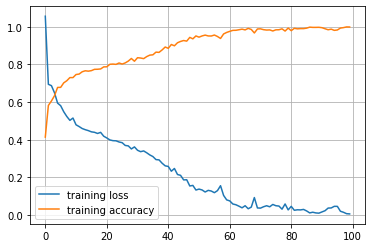

In [ ]:
plt.plot(retVal.history['loss'], label='training loss')
plt.plot(retVal.history['accuracy'], label='training accuracy')
plt.grid(True)
plt.legend()




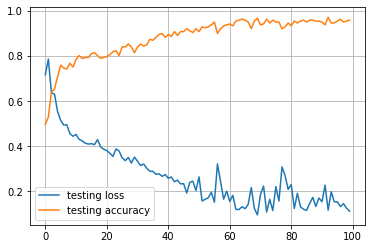

In [ ]:
plt.plot(retVal.history['val_loss'], label='testing loss')
plt.plot(retVal.history['val_accuracy'], label='testing accuracy')
plt.grid(True)
plt.legend()

In [ ]:
# saving model
# MyCnn.save('drowsiness-stage1.h5')
MyCnn.save('save_model/')


INFO:tensorflow:Assets written to: save_model/assets


40
40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


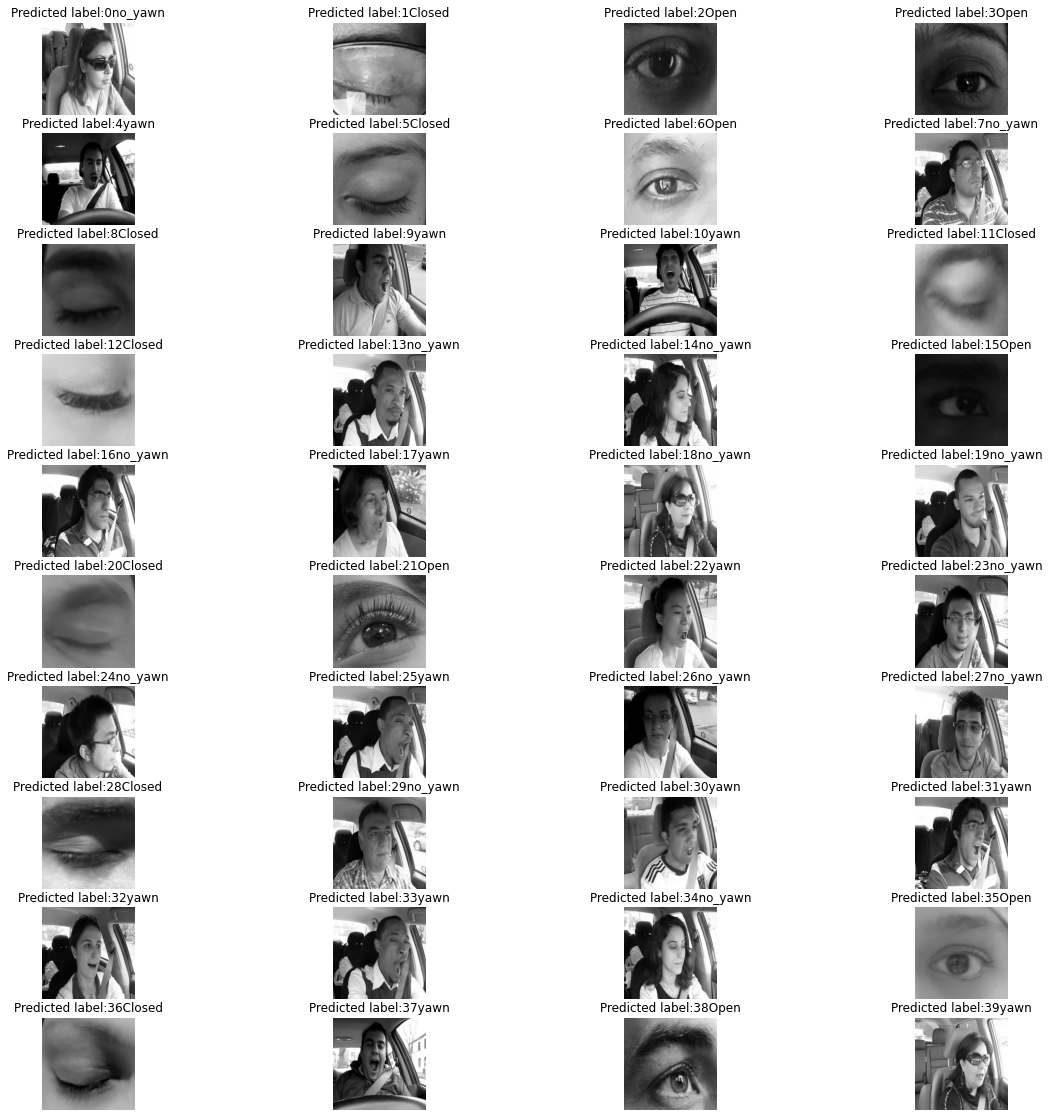

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(2):
    print(len(images))
    predictions = MyCnn.predict(images)
    predlabel = []

    for mem in predictions:
      # print(predictions)
      # print(mem)
      # print(np.argmax(mem))
      predlabel.append(class_names[np.argmax(mem)])

    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:' + str(i) + predlabel[i])
        plt.axis('off')
        plt.grid(True)



In [ ]:
#  in order to download the saved model.
MyCnn.save('save_model/')

INFO:tensorflow:Assets written to: save_model/assets


In [ ]:
# Zipp the save model and then download
!zip -r /content/file.zip /content/kaggle_saved_model

  adding: content/kaggle_saved_model/ (stored 0%)
  adding: content/kaggle_saved_model/saved_model.pb (deflated 89%)
  adding: content/kaggle_saved_model/assets/ (stored 0%)
  adding: content/kaggle_saved_model/variables/ (stored 0%)
  adding: content/kaggle_saved_model/variables/variables.index (deflated 67%)
  adding: content/kaggle_saved_model/variables/variables.data-00000-of-00001 (deflated 14%)
  adding: content/kaggle_saved_model/keras_metadata.pb (deflated 92%)
